In [1]:
# Import TensorFlow and other libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

The number of data points in the dataset is 1797
The image resolution is 8x8


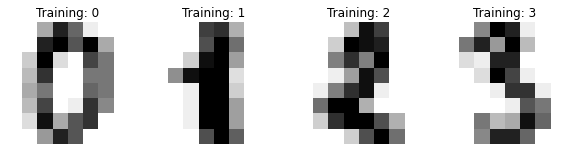

In [2]:
# Download and explore the dataset
from sklearn import datasets

digits = datasets.load_digits()

# Information about the dataset
npoints, xres, yres = digits.images.shape
print('The number of data points in the dataset is {:d}'.format(npoints))
print('The image resolution is {:d}x{:d}'.format(xres, yres))

# Visualise 
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# Create a dataset
from sklearn.model_selection import train_test_split

batch_size = 16
img_height = xres
img_width = yres
class_names = list(range(10))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.5, shuffle=False)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

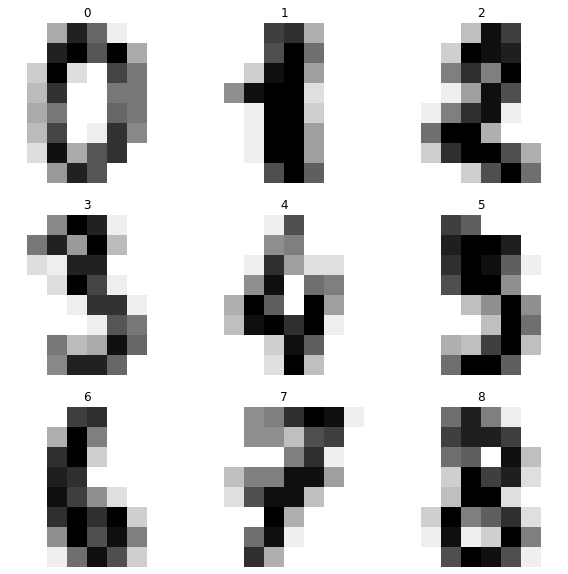

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(labels[i].numpy())
    plt.axis("off")

In [5]:
# Create the mode
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Checkpoint
checkpoint_filepath = '/tmp/checkpoint_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [8]:
# Train the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50
31/57 [===============>..............] - ETA: 0s - loss: 2.0624 - accuracy: 0.3044 
Epoch 00001: val_accuracy improved from -inf to 0.82759, saving model to /tmp/checkpoint_1
57/57 [==============================] - 1s 4ms/step - loss: 1.7269 - accuracy: 0.4465 - val_loss: 0.7682 - val_accuracy: 0.8276
Epoch 2/50
32/57 [===============>..............] - ETA: 0s - loss: 0.6704 - accuracy: 0.8027
Epoch 00002: val_accuracy improved from 0.82759 to 0.85428, saving model to /tmp/checkpoint_1
57/57 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.8263 - val_loss: 0.5031 - val_accuracy: 0.8543
Epoch 3/50
31/57 [===============>..............] - ETA: 0s - loss: 0.3568 - accuracy: 0.8891
Epoch 00003: val_accuracy improved from 0.85428 to 0.90323, saving model to /tmp/checkpoint_1
57/57 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.9031 - val_loss: 0.3219 - val_accuracy: 0.9032
Epoch 4/50
31/57 [===============>..............] -

Epoch 29/50
31/57 [===============>..............] - ETA: 0s - loss: 0.0072 - accuracy: 0.9980    
Epoch 00029: val_accuracy did not improve from 0.96774
57/57 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.1643 - val_accuracy: 0.9544
Epoch 30/50
32/57 [===============>..............] - ETA: 0s - loss: 0.0063 - accuracy: 0.9961
Epoch 00030: val_accuracy did not improve from 0.96774
57/57 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9978 - val_loss: 0.1601 - val_accuracy: 0.9566
Epoch 31/50
31/57 [===============>..............] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 0.96774
57/57 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.2441 - val_accuracy: 0.9422
Epoch 32/50
32/57 [===============>..............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9941
Epoch 00032: val_accuracy did not improve from 0.96774
57/57 [==

In [9]:
# Loading best model
model.load_weights(checkpoint_filepath)

In [10]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

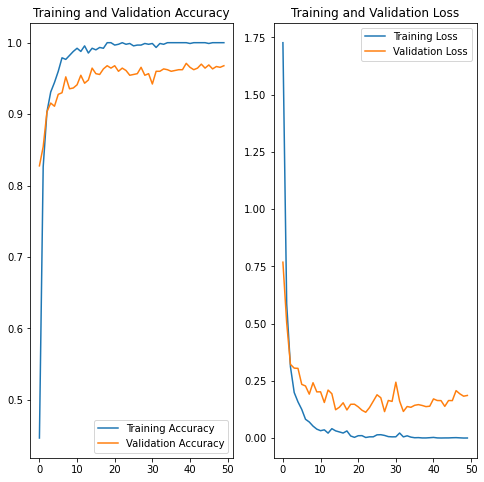

In [11]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.97      0.99      0.98        91
           2       1.00      1.00      1.00        86
           3       1.00      0.95      0.97        91
           4       0.98      0.91      0.94        92
           5       0.96      0.99      0.97        91
           6       0.98      0.99      0.98        91
           7       0.96      1.00      0.98        89
           8       0.99      0.93      0.96        88
           9       0.92      0.97      0.94        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




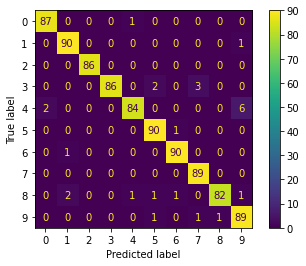

In [12]:
# Analyze the results
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
predicted = np.argmax(tf.nn.softmax(predictions), axis=-1)

print(
    f"Classification report:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test, predicted, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.show()

Real MNIST dataset

The number of data points in the training dataset is 60000
The number of data points in the test dataset is 10000
The image resolution is 28x28
The number of data points in the redced training dataset is 12000


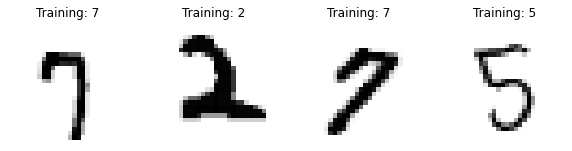

In [13]:
# Import database
import idx2numpy

file_X_train = 'mnist/train-images.idx3-ubyte' 
file_y_train = 'mnist/train-labels.idx1-ubyte'
file_X_test = 'mnist/t10k-images.idx3-ubyte' 
file_y_test = 'mnist/t10k-labels.idx1-ubyte' 

X_train = idx2numpy.convert_from_file(file_X_train)
y_train = idx2numpy.convert_from_file(file_y_train)
X_test = idx2numpy.convert_from_file(file_X_test)
y_test = idx2numpy.convert_from_file(file_y_test)

# Information about the dataset
npoints_train, xres, yres = X_train.shape
npoints_test, _, _ = X_test.shape
print('The number of data points in the training dataset is {:d}'.format(npoints_train))
print('The number of data points in the test dataset is {:d}'.format(npoints_test))
print('The image resolution is {:d}x{:d}'.format(xres, yres))

# Split data into 20% and 80% subsets and ignore the 80% dataset
X_train, _, y_train, _ = train_test_split(
    X_train, y_train, test_size=0.8, shuffle=True)
npoints_train, _, _ = X_train.shape
print('The number of data points in the redced training dataset is {:d}'.format(npoints_train))

# Visualise 
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


# Prepare datasets for TF
batch_size = 32
img_height = xres
img_width = yres
class_names = list(range(10))

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

train_ds = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train.astype('float32'))).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test.astype('float32'), y_test.astype('float32'))).batch(batch_size)

In [14]:
# Create the mode
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Checkpoint
checkpoint_filepath = '/tmp/checkpoint_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=10,
    mode='auto', 
    baseline=None, 
    restore_best_weights=True
)


# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback, early_stopping]
)

# Loading best model
model.load_weights(checkpoint_filepath)

Epoch 1/100
373/375 [============================>.] - ETA: 0s - loss: 1.0095 - accuracy: 0.8035
Epoch 00001: val_accuracy improved from -inf to 0.95320, saving model to /tmp/checkpoint_2
375/375 [==============================] - 4s 9ms/step - loss: 1.0053 - accuracy: 0.8040 - val_loss: 0.1587 - val_accuracy: 0.9532
Epoch 2/100
372/375 [============================>.] - ETA: 0s - loss: 0.1737 - accuracy: 0.9456
Epoch 00002: val_accuracy improved from 0.95320 to 0.97010, saving model to /tmp/checkpoint_2
375/375 [==============================] - 4s 10ms/step - loss: 0.1729 - accuracy: 0.9458 - val_loss: 0.0971 - val_accuracy: 0.9701
Epoch 3/100
372/375 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9660
Epoch 00003: val_accuracy improved from 0.97010 to 0.97240, saving model to /tmp/checkpoint_2
375/375 [==============================] - 4s 12ms/step - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 4/100
375/375 [==============

Epoch 29/100
375/375 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9926
Epoch 00029: val_accuracy did not improve from 0.98680
375/375 [==============================] - 7s 20ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 0.0740 - val_accuracy: 0.9840
Epoch 30/100
374/375 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9930
Epoch 00030: val_accuracy did not improve from 0.98680
375/375 [==============================] - 8s 21ms/step - loss: 0.0259 - accuracy: 0.9930 - val_loss: 0.1014 - val_accuracy: 0.9797
Epoch 31/100
374/375 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9924
Epoch 00031: val_accuracy did not improve from 0.98680
375/375 [==============================] - 7s 19ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0955 - val_accuracy: 0.9802
Epoch 32/100
371/375 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9922
Epoch 00032: val_accuracy did not improve from 

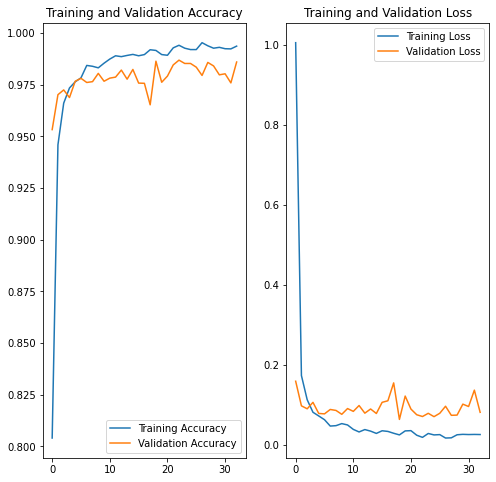

In [15]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.96      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




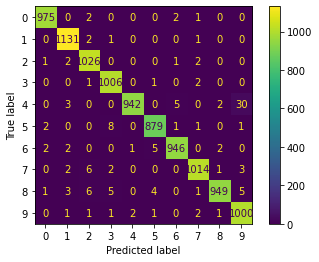

In [16]:
# Analyze the results
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting
predictions = model.predict(X_test)
predicted = np.argmax(tf.nn.softmax(predictions), axis=-1)

print(
    f"Classification report:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test, predicted, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.show()

In total 132 mistakes out of 10000 images


100%|█████████████████████████████████████████████████████████████████████████████████| 132/132 [19:01<00:00,  8.65s/it]


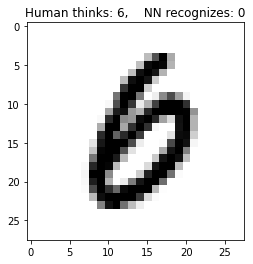

In [17]:
# Error analyses
from tqdm import tqdm

err = []
for i in range(len(y_test)):
  if y_test[i] != predicted[i]:
    err.append(i)

print('In total {:d} mistakes out of {:d} images'.format(len(err), len(y_test)))

for i in tqdm(range(len(err))):
  plt.imshow(X_test[err[i]], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.title('Human thinks: {:},    NN recognizes: {:}'.format(y_test[err[i]], predicted[err[i]]))
  plt.savefig('./errors/{}.png'.format(err[i]), dpi=600)